![example](https://variety.com/wp-content/uploads/2021/11/Halo-Paramount-Plus-1.jpg)

# Why Microsoft Should Tap into Its Gaming IP to Open a Profitable Movie Studio

**Authors:** Albert Chen, Sean Conlon, John Nahra
***

## Overview

Microsoft wants to open its own movie studio and is looking for recommendations that will improve its chances of success in this new venture. Knowing that Microsoft owns Xbox and thus has existing video game intellectual property, we posited that this pre-existing unique content could be turned into movies that have a great chance to perform well at the box office. Bolstering our case: (1) video games are very popular and have international followings, which means a large pre-built audience, (2) video game movies represent free advertising for the games themselves and thus can boost game sales, (3) video games are cinematic, immersive, and have compelling stories, meaning they translate well to the big screen, and (4) recent movies based off video games have performed well, and many of the top performing movie genres align with video game genres. We looked at movie data from IMDb and The Numbers on box office revenue, production budget, genre, ratings, and runtime. As a result of our analysis, we recommend that Microsoft turn its gaming IP into movies at least two hours in length with global appeal and that they ensure quality in writing and production. We feel these steps will maximize Microsoft's return on investment (ROI) as they seek to open a profitable movie studio.

## Business Problem

Microsoft wants to open a movie studio. As a private company, they are primarily concerned with generating profit. Thus, the question is: how to open a profitable movie studio? To answer this question, it makes the most sense to look at the most profitable movies and their characteristics.

## Data Understanding

We used movie data from IMDb and The Numbers on box office revenue (worldwide and domestic), production budget, genre, ratings (out of 10), and runtime. Our target variable is ROI, which we calculated by subtracting the production budget from worldwide box office revenue to get a profit measure, then dividing profit by the production budget (multiplied by 100 to get ROI as % return). We also calculated a domestic revenue share variable (domestic box office revenue divided by worldwide box office revenue * 100). With the ROI for each film, we can group films by genre, runtime, rating, and domestic revenue share and determine if there are optimal characteristics of high ROI movies.

In [86]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [87]:
# Connected to IMDB database

conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [88]:
# Imported our various CSV's to understand contents as well

df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df2 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
df3 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df4 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [89]:
# Wanted to know the schema of our IMDB database to understand tables

schema_df5 = pd.read_sql("""

SELECT *
    FROM sqlite_master

""", conn)

schema_df5

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [90]:
# Now pull in the database tables of interest as Pandas dataframes
# First, movie_basics table

table1 = pd.read_sql("""

SELECT *
FROM movie_basics

""", conn)

movie_basics = table1

In [91]:
# Second, movie_ratings table

table2 = pd.read_sql("""

SELECT *
FROM movie_ratings

""", conn)

movie_ratings = table2

In [92]:
# We merged both movie_basics and movie_ratings so we could have information from both tables

database_merge = movie_basics.merge(movie_ratings, on="movie_id", how="left")
database_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [93]:
# We set the start year to be equal to our current year, 2023 or prior

database_merge = database_merge[database_merge['start_year'] <= 2023]
database_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [94]:
# We want to merge movie_budgets csv with our database_merge file, but first need to separate out year

df4['year'] = pd.DatetimeIndex(df4['release_date']).year
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [95]:
# Change database_merge primary_title to movie to match with our csv file
database_merge = database_merge.rename(columns={'primary_title': 'movie'})
database_merge

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [96]:
# Change database_merge start_year to year to match with our csv file
database_merge = database_merge.rename(columns={'start_year': 'year'})
database_merge

,movie_id,movie,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [97]:
# Next, we'll merge the csv and database merge on movie name and year released

dataset = df4.merge(database_merge, on=['movie', 'year'])
dataset

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1543,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt4931374,Exeter,92.0,None,NaN,NaN
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [98]:
# We then drop values that are NaN

dataset_naclean = dataset.dropna()
dataset_naclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1546
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1490 non-null   int64  
 1   release_date       1490 non-null   object 
 2   movie              1490 non-null   object 
 3   production_budget  1490 non-null   object 
 4   domestic_gross     1490 non-null   object 
 5   worldwide_gross    1490 non-null   object 
 6   year               1490 non-null   int64  
 7   movie_id           1490 non-null   object 
 8   original_title     1490 non-null   object 
 9   runtime_minutes    1490 non-null   float64
 10  genres             1490 non-null   object 
 11  averagerating      1490 non-null   float64
 12  numvotes           1490 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 163.0+ KB


In [99]:
# Check to see if there are still movie titles that are duplicated:
dataset_naclean['movie'].duplicated().sum()

31

In [100]:
# We note that there are duplicates of the same movie, but one entry has lower votes (potentially an int'l. release) 
# In order to address this we sort the number of votes and drop the entry with fewer rating votes

dataset_naclean = dataset_naclean.sort_values('numvotes', ascending = False).drop_duplicates('movie').sort_index()
dataset_naclean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,45,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",2017,tt4393036,Emily,83.0,Drama,6.8,13.0
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [101]:
#check to see if any duplicates remaining:

dataset_naclean['movie'].duplicated().sum()

0

In [102]:
# Now that our dataset is cleaned, we rename it as our final dataset

dataset_final = dataset_naclean
dataset_final

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,45,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",2017,tt4393036,Emily,83.0,Drama,6.8,13.0
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [103]:
# Export as .csv for analytical use

dataset_final.to_csv('masterdataset.csv')

## Data Preparation

After looking at the movie data, we determined that minimum parameters should be set for production budget, number of rating votes, and runtime. We chose to look at films with production budgets over $10 million and runtimes over 75 minutes because we wished to remove outliers at the bottom of the distribution, and because it is reasonable to assume that Microsoft, as a large company with deep pockets, will not be making very small budget films (which would tend to be shorter in length). (Very small production budget films also can skew the ROI data if they perform well due to the smaller production budget denominator in the ROI calculation.) We set the minimum number of rating votes at 1000 to determine that the average rating was representative of a larger population rather than skewed by a select few. After filtering, we were left with roughly 1000 movies that were released between 2010 and 2019.

In [104]:
# Start off by importing our masterdataset.csv as a dataframe

df = pd.read_csv('masterdataset.csv')
df

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1541,45,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",2017,tt4393036,Emily,83.0,Drama,6.8,13.0
1455,1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1456,1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1457,1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [105]:
# Since we're doing analysis of budget, we want to change monetary values into integers
# for 'worldwide_gross', 'domestic_gross', 'production_budget' and calculate ROI

df['worldwide_gross'] = df['worldwide_gross'].str[1:]

df['worldwide_gross'] = df['worldwide_gross'].str.replace(',','')

df['worldwide_gross'] = df['worldwide_gross'].astype(int)

df['domestic_gross'] = df['domestic_gross'].str[1:]

df['domestic_gross'] = df['domestic_gross'].str.replace(',','')

df['domestic_gross'] = df['domestic_gross'].astype(int)

df['production_budget'] = df['production_budget'].str[1:]

df['production_budget'] = df['production_budget'].str.replace(',','')

df['production_budget'] = df['production_budget'].astype(int)

df['profit'] = df['worldwide_gross'] - df['production_budget']

df['ROI'] = df['profit'] / df['production_budget'] * 100

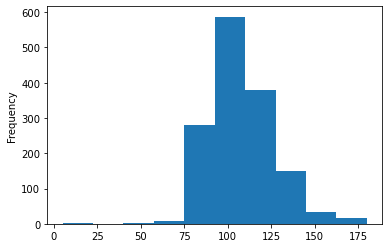

In [106]:
#looking at distribution of runtime
df['runtime_minutes'].plot(kind='hist');

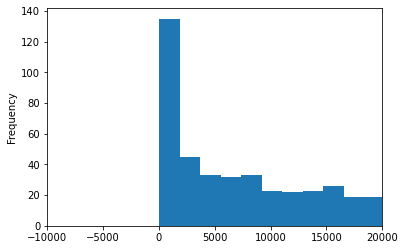

In [107]:
#looking at distribution of number of rating votes
df['numvotes'].plot(kind='hist',bins=1000)
plt.xlim(-10000,20000);

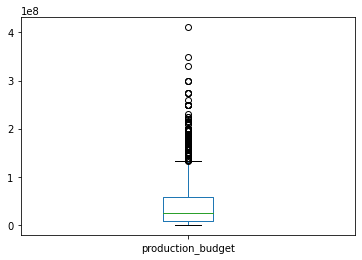

In [108]:
#looking at distribution of production budget
df['production_budget'].plot(kind='box');

In [109]:
#looking at descriptive distribution of production budget
df['production_budget'].describe()

count    1.459000e+03
mean     4.514845e+07
std      5.645823e+07
min      1.500000e+04
25%      8.000000e+06
50%      2.400000e+07
75%      5.775000e+07
max      4.106000e+08
Name: production_budget, dtype: float64

In [110]:
# We decide on our filtered conditions: production budget greater than 10M, movie runtime over 75 min
# and number of votes > 1000

df_filtered = df[(df['production_budget'] >= 10000000) & (df['runtime_minutes'] >= 75) & (df['numvotes'] >= 1000)]


In [111]:
# Our first question we wanted to answer, are video games successful?
# Cross referenced our list against video game movies released during this time frame 2010-2019

videogames = ['Resident Evil: Retribution', 'Resident Evil: Afterlife', 'Need for Speed', 'Hitman: Agent 47', 'Warcraft', 'Tomb Raider', 'Rampage']

videogame_movies = df_filtered[df_filtered['movie'].isin(videogames)]
videogame_movies

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit,ROI
100,102,46,"Jun 10, 2016",Warcraft,160000000,47225655,425522281,2016,tt0803096,Warcraft,123.0,"Action,Adventure,Fantasy",6.9,225557.0,265522281,165.951426
171,176,90,"Apr 13, 2018",Rampage,120000000,101028233,428056280,2018,tt2231461,Rampage,107.0,"Action,Adventure,Sci-Fi",6.1,115891.0,308056280,256.713567
238,248,70,"Mar 16, 2018",Tomb Raider,90000000,58250803,273477501,2018,tt1365519,Tomb Raider,119.0,"Action,Adventure,Fantasy",6.3,163560.0,183477501,203.863890
311,325,70,"Mar 14, 2014",Need for Speed,66000000,43568507,194169619,2014,tt2369135,Need for Speed,132.0,"Action,Crime,Thriller",6.5,154909.0,128169619,194.196392
322,336,4,"Sep 14, 2012",Resident Evil: Retribution,65000000,42345531,240647629,2012,tt1855325,Resident Evil: Retribution,95.0,"Action,Horror,Sci-Fi",5.4,125191.0,175647629,270.227122
365,380,70,"Sep 10, 2010",Resident Evil: Afterlife,57500000,60128566,295874190,2010,tt1220634,Resident Evil: Afterlife,96.0,"Action,Adventure,Horror",5.9,153270.0,238374190,414.563809
563,585,8,"Aug 21, 2015",Hitman: Agent 47,35000000,22467450,82182803,2015,tt2679042,Hitman: Agent 47,96.0,"Action,Adventure,Crime",5.7,80510.0,47182803,134.808009


### Precedent for Successful Video Game Movies

We found several movies based on video games in our sample, and they had solid ROI. We also noted the genres in which they were classified, which was important to note before our genre analysis below.

In [112]:
# Clean up the table by dropping original title and sorting release_date

videogame_movies = videogame_movies.drop('original_title', axis = 1)
videogame_movies = videogame_movies.sort_values(by = 'release_date', ascending = False)

In [113]:
# Saved this file to a separate csv for the table we used in presentation

videogame_movies.to_csv('videogame_movies.csv')

In [114]:
#created new variable "domestic revenue share"
df_filtered['dom_revshare'] = df_filtered['domestic_gross'] / df_filtered['worldwide_gross'] * 100

<ipython-input-114-2779ba51f8e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dom_revshare'] = df_filtered['domestic_gross'] / df_filtered['worldwide_gross'] * 100


In [115]:
#our filtered data set for analysis is roughly 1000 movies
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1059
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1050 non-null   int64  
 1   id                 1050 non-null   int64  
 2   release_date       1050 non-null   object 
 3   movie              1050 non-null   object 
 4   production_budget  1050 non-null   int64  
 5   domestic_gross     1050 non-null   int64  
 6   worldwide_gross    1050 non-null   int64  
 7   year               1050 non-null   int64  
 8   movie_id           1050 non-null   object 
 9   original_title     1050 non-null   object 
 10  runtime_minutes    1050 non-null   float64
 11  genres             1050 non-null   object 
 12  averagerating      1050 non-null   float64
 13  numvotes           1050 non-null   float64
 14  profit             1050 non-null   int64  
 15  ROI                1050 non-null   float64
 16  dom_revshare       1043 

## Data Modeling

We grouped films by genre, runtime, rating, and domestic revenue share to determine if there are optimal characteristics of high ROI movies. We looked at both mean and median ROI of each runtime and rating bin just in case the mean was skewed by outliers, but the results were similar. For genres, we used a weighted mean ROI measure, which gives more weight to films with larger budgets and revenues. We felt this was appropriate given the potential for smaller sample sizes when grouping by genre (we only used genres with greater than five movies in order to lessen this concern somewhat). In addition, we felt it was better to give more weight to larger films using the weighted ROI rather than give more weight to smaller films with high ROIs using mean ROI, since Microsoft was more likely to produce large budget films.

We also looked at the top 100 films by ROI as well as films with negative ROI and observed each group's characteristics as well.

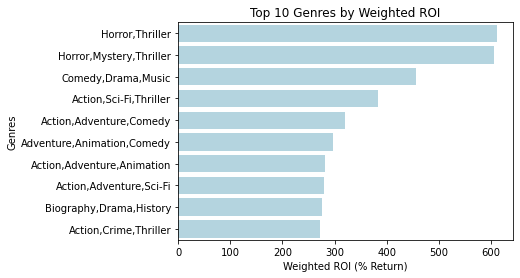

In [116]:
#Adjust genre_count to only include genres with greater than 5 movies
genre_counts = df_filtered['genres'].value_counts()
filtered_genres = genre_counts[genre_counts > 5].index

df_filtered_genre = df_filtered[df_filtered['genres'].isin(filtered_genres)]

#Grouped data by genre and calculated the sums of profit and production budget for each genre
profit_by_genre = df_filtered_genre.groupby('genres')['profit'].sum()
budget_by_genre = df_filtered_genre.groupby('genres')['production_budget'].sum()

#Weighted ROI
weighted_roi = profit_by_genre/budget_by_genre

#Top 10 genres by weighted ROI
top_10_genres = weighted_roi.nlargest(10)

#Create barchart of top 10 genres by Weighted ROI
sns.barplot(x=top_10_genres * 100, y=top_10_genres.index, color='lightblue')
plt.title('Top 10 Genres by Weighted ROI')
plt.ylabel('Genres')
plt.xlabel('Weighted ROI (% Return)')

#Saves plot of graph to new file location in Folder
plt.savefig("Graphs/Top10_Genre_Weighted_ROI.jpeg", bbox_inches = 'tight')

plt.show()

### Gaming Genres Align with Top Profitable Genres

As illustrated in this chart, genres associated with video games (meaning Action, Sci-Fi, Thriller, Adventure, and Horror) are among the top genres by weighted ROI, which shows that video game movies can return a high ROI at the box office. 

In [117]:
#Creating a bin for plotting runtime_minutes
df_filtered['runtimes_bins'] = pd.cut(df_filtered['runtime_minutes'], [75,90,105,120,135,150,165,180])


<ipython-input-117-2cb03f06cc27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['runtimes_bins'] = pd.cut(df_filtered['runtime_minutes'], [75,90,105,120,135,150,165,180])


In [118]:
#Checking the bin creation was successful
df_filtered['runtimes_bins']


0       (135, 150]
1       (105, 120]
2       (135, 150]
3       (135, 150]
4       (105, 120]
           ...    
1055     (90, 105]
1056     (90, 105]
1057     (90, 105]
1058     (90, 105]
1059     (90, 105]
Name: runtimes_bins, Length: 1050, dtype: category
Categories (7, interval[int64]): [(75, 90] < (90, 105] < (105, 120] < (120, 135] < (135, 150] < (150, 165] < (165, 180]]

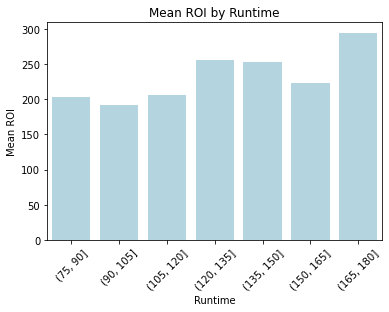

In [119]:
#Grouped data by runtime and mean of ROI 
mean_ROI_by_runtime_bin = df_filtered.groupby('runtimes_bins')['ROI'].mean()

#Create barchart of mean ROI by runtime
sns.barplot(x= mean_ROI_by_runtime_bin.index ,y= mean_ROI_by_runtime_bin, color='lightblue')
plt.ylabel('Mean ROI')
plt.xlabel('Runtime')
plt.title('Mean ROI by Runtime')
plt.xticks(rotation=45)

#Saves plot of graph to new file location in Folder
plt.savefig("Graphs/Mean_ROI_Runtime.jpeg", bbox_inches = 'tight')

plt.show()


### Films of At Least Two Hours Tend to Perform Better

This is a chart of mean ROI for different 15 minute runtime bins. There is not a large outperformance, but films of at least two hours do appear to have a higher ROI. Especially notable is the ROI of movies approaching three hours in length. Yet it is important to note the number of movies in that bin is much smaller, and comprises several big budget films, unsurprising as they tend to have longer runtimes.

In [120]:
#Creating bins for plotting average rating
df_filtered['averagerating_bin'] = pd.cut(df_filtered['averagerating'], [3,4,5,6,7,8,9])


<ipython-input-120-5e426577baff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['averagerating_bin'] = pd.cut(df_filtered['averagerating'], [3,4,5,6,7,8,9])


In [121]:
#Checking if bin creation was successful
df_filtered['averagerating_bin']

0       (6, 7]
1       (5, 6]
2       (7, 8]
3       (8, 9]
4       (6, 7]
         ...  
1055    (6, 7]
1056    (5, 6]
1057    (5, 6]
1058    (5, 6]
1059    (5, 6]
Name: averagerating_bin, Length: 1050, dtype: category
Categories (6, interval[int64]): [(3, 4] < (4, 5] < (5, 6] < (6, 7] < (7, 8] < (8, 9]]

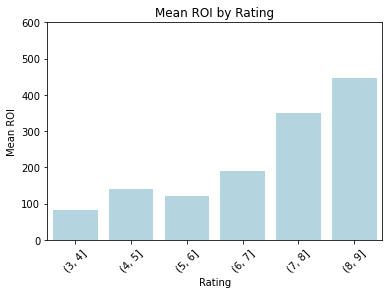

In [122]:
#Grouped data by rating and mean ROI
mean_ROI_by_rating_bin = df_filtered.groupby('averagerating_bin')['ROI'].mean()

#Create barchart of mean ratings
sns.barplot(x= mean_ROI_by_rating_bin.index, y= mean_ROI_by_rating_bin, color='lightblue')
plt.ylim(0, 600)
plt.xlabel('Rating')
plt.ylabel('Mean ROI')
plt.title('Mean ROI by Rating')
plt.xticks(rotation=45)

#Saves plot of graph to new file location in Folder
plt.savefig("Graphs/Mean_ROI_Rating.jpeg", bbox_inches = 'tight')

plt.show()

### Higher Ratings Lead to Larger Profits

This is a chart of mean ROI grouped into rating bins (ratings are measured out of 10). ROI increases dramatically as ratings rise past 6 out of 10. This finding is not unexpected, but it serves as a reminder of the importance of producing high-quality films in terms of financial performance.

In [123]:
#create a dataframe of the top 100 movies by ROI
df_top100_roi = df_filtered.nlargest(100,'ROI')

In [124]:
#look at characteristics of top 100 movies by ROI
df_top100_roi.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,year,runtime_minutes,averagerating,numvotes,profit,ROI,dom_revshare
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,686.400000,52.880000,4.389000e+07,1.615563e+08,4.103454e+08,2014.740000,112.330000,6.835000,238216.400000,3.664554e+08,949.954436,45.041074
std,331.112725,26.545284,5.089232e+07,1.353349e+08,3.984576e+08,2.661434,17.483068,1.087057,179461.546678,3.506963e+08,421.856186,16.882833
min,3.000000,2.000000,1.000000e+07,8.178001e+06,6.822095e+07,2010.000000,84.000000,1.600000,18728.000000,5.822095e+07,575.182944,6.715480
25%,381.000000,34.750000,1.275000e+07,6.439624e+07,1.271130e+08,2012.000000,98.000000,6.300000,92035.500000,1.121130e+08,667.803545,32.533763
50%,800.500000,55.000000,2.000000e+07,1.162319e+08,2.545555e+08,2015.000000,110.000000,7.000000,187759.000000,2.321596e+08,804.418320,42.036576
75%,996.750000,71.500000,5.575000e+07,2.142094e+08,5.494989e+08,2017.000000,123.250000,7.700000,344092.750000,4.934989e+08,1076.917975,56.234656
max,1077.000000,100.000000,3.000000e+08,6.788155e+08,2.048134e+09,2019.000000,167.000000,8.500000,820847.000000,1.748134e+09,2459.723617,84.867107


In [125]:
#create a dataframe of all the unprofitable movies
df_losers = df_filtered.loc[df_filtered['profit'] < 0]

In [126]:
#look at characteristics of unprofitable movies
df_losers.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,year,runtime_minutes,averagerating,numvotes,profit,ROI,dom_revshare
count,212.000000,212.000000,2.120000e+02,2.120000e+02,2.120000e+02,212.000000,212.000000,212.000000,212.000000,2.120000e+02,212.000000,205.000000
mean,711.061321,46.037736,3.671887e+07,9.921694e+06,2.075555e+07,2014.014151,108.712264,6.011792,45448.877358,-1.596331e+07,-52.130214,51.710300
std,277.014433,28.561872,4.021369e+07,1.265826e+07,3.202631e+07,2.674221,16.519907,0.923009,51674.717906,1.908628e+07,31.623921,33.127223
min,1.000000,1.000000,1.000000e+07,0.000000e+00,0.000000e+00,2010.000000,80.000000,1.900000,1024.000000,-2.002376e+08,-100.000000,0.000000
25%,510.000000,21.000000,1.600000e+07,6.682598e+05,3.947679e+06,2012.000000,96.000000,5.400000,12907.250000,-1.956818e+07,-79.250250,23.914195
50%,750.500000,47.000000,2.500000e+07,6.087390e+06,1.082999e+07,2014.000000,107.000000,6.100000,33242.000000,-1.155457e+07,-52.037302,53.783876
75%,927.250000,69.250000,4.025000e+07,1.368229e+07,2.417380e+07,2016.000000,118.250000,6.625000,59536.250000,-7.302970e+06,-21.618885,82.924152
max,1113.000000,100.000000,3.500000e+08,8.930212e+07,2.600021e+08,2019.000000,172.000000,8.200000,403755.000000,-7.339500e+04,-0.174750,100.000000


### Profitable Movies Have Greater Global Appeal

One key difference between the most profitable and the most unprofitable movies was their domestic revenue share. More profitable movies tended to have a lower domestic revenue share, meaning more revenue from international sources.

## Evaluation

Given the data we were given to work with, we believe that our work provides a good jumping off point for Microsoft's movie studio.

In our view, there is compelling evidence that video game genres align with current top genres by ROI. However, in other cases, findings must be interpreted carefully. It can be difficult to discern correlation from causation. For example, the most profitable movies had a greater share of box office revenue abroad than unprofitable movies. Yet is this because these films made their movie with global appeal, or because it was simply a good movie and thus performed well everywhere (and the rest of the world is larger than the US)? We also need to be careful interpreting findings given that they may not be statistically significant. How confident can we be that the mean ROI for films of at least two hours is truly higher than the mean ROI for films of less than two hours? To answer this question, we would need more data and to run hypothesis tests.

## Conclusion

As a result of our analysis, we have four key recommendations. First, there's a strong case for producing video games, given that popular gaming genres align with current successful movie genres. Second, at least two hours appears to have the potential to be the optimal runtime to achieve the highest possible ROI. Third, Microsoft should ensure quality in writing and producing. Films rated higher than 6 out of 10 did significantly better at the box office. And fourth, keep international markets in mind. Video games are international products. Microsoft can boost ROI by giving these movies global appeal.

If we had more data, one thing we would love to do is group films by genre and runtime for example to see if there is an optimal runtime for genre-specific movies.

One future step is to explore which video game IP to turn into a movie first. We only looked at data before 2019, and a good number of video game movies have come out since then, so looking into more recent genre trends would be useful in producing a successful box office hit. After deciding on the video game IP, next steps would be to determine the right budget size, movie characteristics such as the target demographic, and identifying whether to tweak the genre to maximize ROI.

Xbox Gaming Studios has many gaming titles it can tap into, so the possibilities are endless!